# Partial Derivatives of Multivariate Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

Define a function
```
f(x,y) for z = x^2 - y^2
```

In [2]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

In [3]:
xs = np.linspace(-3,3,1000)

In [4]:
zs_wrt_x = f(xs,0)

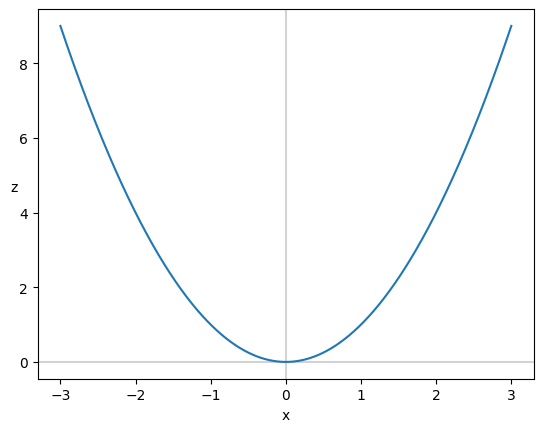

In [5]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_=ax.plot(xs, zs_wrt_x)

to determine the slope of z w.r.t. x at a given point along the curve, we can use the partial derivative dz/dx = 2x

In [6]:
def delz_delx(my_x,my_y): # y isn't relevant for this partial derivative; it often would be
    return 2*my_x

In [7]:
x_samples = [-2,-1,0,1,2]

In [8]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [9]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):
    my_z = my_f(my_x, my_y) # z = f(x,y)
    plt.scatter(my_x, my_z, c=col, zorder=3)
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivatrrive of f(x,y) w.r.t. x
    tangent_b = my_z - tangent_m * my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, linestyle='dashed', linewidth=0.7, zorder=3)

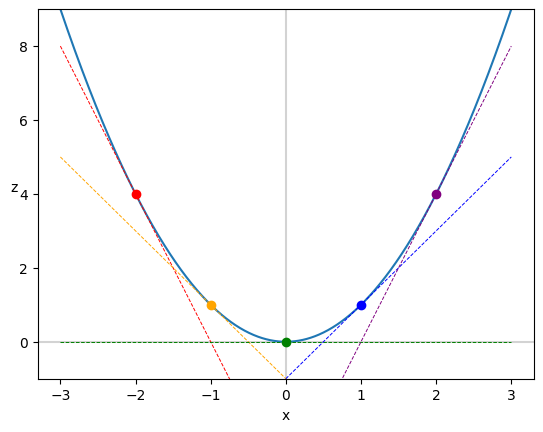

In [10]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs,x,0,f,delz_delx,colors[i])
    
plt.ylim(-1,9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_=ax.plot(xs,zs_wrt_x)

In [11]:
ys = np.linspace(-3,3,1000)

In [12]:
zs_wrt_y = f(0,ys)

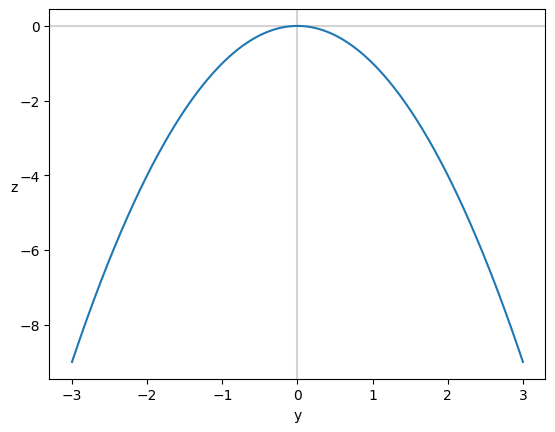

In [13]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_=ax.plot(ys, zs_wrt_y)

In [14]:
zs_wrt_y = f(2,ys)

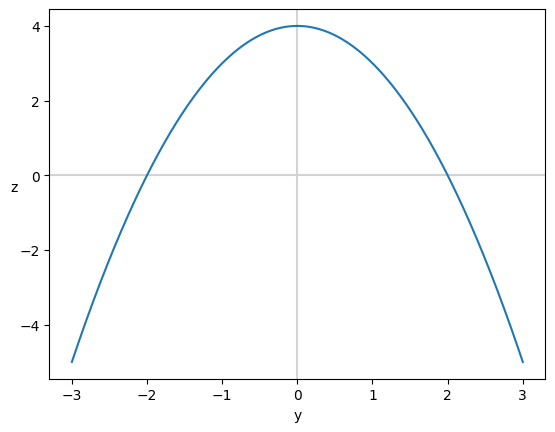

In [15]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_=ax.plot(ys, zs_wrt_y)

In [16]:
def delz_dely(my_x, my_y):
    return -1*my_y

In [17]:
y_samples = [-2,-1,0,1,2]

In [18]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys
    my_z = my_f(my_x, my_y) # z = f(x,y)
    plt.scatter(my_y, my_z, c=col, zorder=3)
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivatrrive of f(x,y) w.r.t. x
    tangent_b = my_z - tangent_m * my_y # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_ys + tangent_b
    
    plt.plot(my_ys, tangent_line, c=col, linestyle='dashed', linewidth=0.7, zorder=3)
    

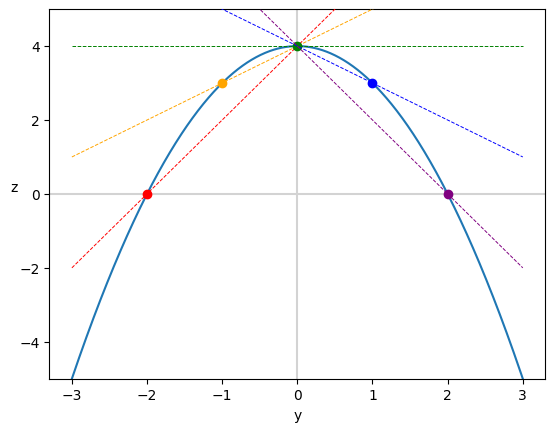

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys,2,y,f,delz_dely,colors[i])
    
plt.ylim(-5,5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_=ax.plot(xs,zs_wrt_y)

# Calculating Partial Derivatives with Autodiff

In [20]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [21]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [22]:
z = f(x,y)  # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [23]:
z.backward() # Autodiff

In [24]:
x.grad

tensor(0.)

In [25]:
y.grad

tensor(-0.)